# Handin 5

We'll see how we can move a shape in the plane to a standard position.

Consider the figure-eight plotted by

$$x(t)=3cos(t),\ y(t) = sin(2t),\ \ \ for\ 0\leq t \leq 2\pi$$

## (a) Plot the curve $(x(t), y(t))$

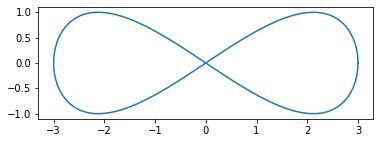

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tMin = 0;
tMax = 2 * np.pi;

def x(t):
    return np.cos(t) * 3

def y(t):
    return np.sin(2*t)

lin = np.linspace(tMin, tMax, 100)
xs = x(lin)
ys = y(lin)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(xs,ys)

## (b) Use the following snippet to rotate the figure-eight

In [2]:
rng = np.random.default_rng()
theta = rng.uniform(np.pi/5, 5 * np.pi/5)
print(theta)

2.896862665055404


In [3]:
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
print(R)

[[-0.97020278 -0.24229437]
 [ 0.24229437 -0.97020278]]


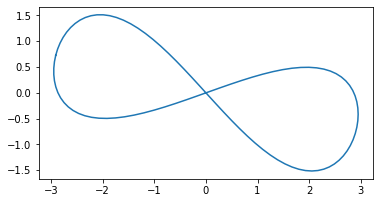

In [4]:
f = np.array([xs,ys])
# Rotate the figure
Rf = R@f

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(Rf[0], Rf[1])

## (c) Pick some points from the rotate figure and add some noise to it. Plot the result

I will create a function that will draw points from the rotated figure randomly.

In [5]:
def randomPoints(n):
    points = np.empty((2,n))
    i = 0;
    j = 0;
    while(i < n):
        rand = rng.uniform(0.,1.)
        if (rand < .5):
            safeJ = j % Rf.shape[1]
            xVal = Rf[0][safeJ]
            yVal = Rf[1][safeJ]
            points[0][i] = xVal
            points[1][i] = yVal
            i += 1
        j += 1
    return points

Then we use the rng.normal function to create some noise and add it to the selection of points.

In [6]:
n = 1000
noise = rng.normal(0.,0.1,(2, n))
A = randomPoints(n) + noise

Then we plot the result.

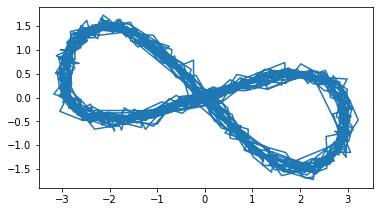

In [7]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(A[0], A[1])